In [545]:
import scipy.io
import numpy as np
import os
import math
from numpy import corrcoef, sum, log, arange
from pylab import pcolor, show, colorbar
import matplotlib.pyplot as plt
import random
import scipy.stats as sci
os.chdir('/Users/Michael/Desktop/Spring2017/CS289/HW3/mnist')
data = scipy.io.loadmat('train.mat')
training = data["trainX"]

In [543]:
#6.a
avg = np.zeros((10,784))
cov = np.zeros((10,784,784))  
for i in range(10):
    digit = training[training[:,784]==i]
    feature = digit[:,0:784]
    N=np.shape(digit)[0]
    normalized_feature = np.empty([N,784])
    for j in range(N):
        normalized_feature[j] = feature[j]/np.linalg.norm(feature[j],ord=2)
    avg[i] = np.mean(normalized_feature, axis=0)
    cov[i] = np.cov(normalized_feature.transpose())


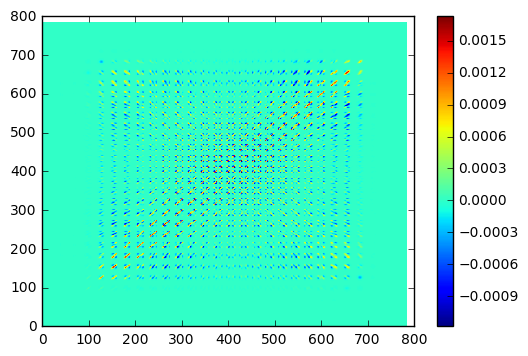

In [37]:
#6.b
pcolor(cov[0])
colorbar()
show()
#The diagonal terms in general are larger than off-diagonal terms. 
#This indicates that variances are larger than covariances

In [546]:
#6.c
np.random.shuffle(training)
k = len(training)-10000

#Process training data
training_feature = training[0:k,0:784]
training_digit = training[0:k,784]
normalized_feature = np.empty((50000,784))
for i in range(k):
    normalized_feature[i] = training_feature[i]/np.linalg.norm(training_feature[i],ord=2)
normalized_training = np.asarray([np.append(normalized_feature[i],training_digit[i]) for i in range(50000)])

#Process validation data
validation_digit = training[k:,784]
validation_feature = training[k:,0:784]
normalized_validation = np.zeros((10000,784))
for i in range(10000):
    normalized_validation[i] = validation_feature[i]/np.linalg.norm(validation_feature[i],ord=2)

#Compute priors
prior=np.empty((10,1))
for i in range(10):    
    prior[i] = len(training[training[:,784]==i])/60000  

sample_size = [100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000]

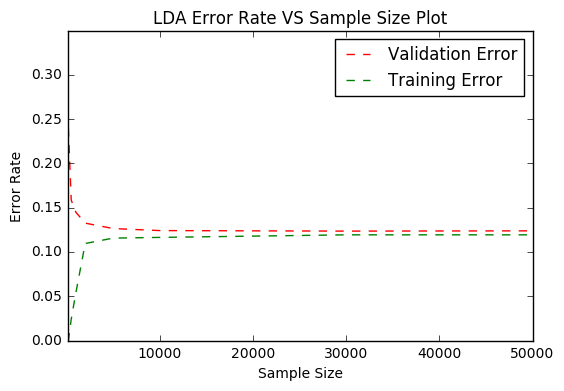

[0.0, 0.0, 0.024, 0.053999999999999999, 0.1095, 0.11559999999999999, 0.1164, 0.1193, 0.1193]
[0.29609999999999997, 0.23769999999999999, 0.1585, 0.14480000000000001, 0.13250000000000001, 0.12640000000000001, 0.1241, 0.1235, 0.12379999999999999]


In [547]:
#LDA
LDA_validation_error = list(range(0))
LDA_training_error = list(range(0))
for l in sample_size:
    index = random.sample(range(k),l)
    subset = np.asarray([normalized_training[i] for i in index])
    mean = np.empty((10,784))
    cov = np.empty((10,784,784))
    #Calculate MLE
    for j in range(10):
        digit = subset[subset[:,784]==j]
        mean[j] = np.mean(digit[:,0:784],axis=0)
        cov[j] = np.cov(digit[:,0:784].transpose()) + 0.001*np.eye(784)
    covariance=np.mean(cov,axis=0)
    LDA_validation_posterior = np.empty((10,10000))
    for i in range(10):
        LDA_validation_posterior[i] = sci.multivariate_normal.logpdf(normalized_validation,mean[i],covariance) + math.log(float(prior[i]))
    LDA_training_posterior = np.empty((10,l))
    LDA_validation_error.append((LDA_validation_posterior.argmax(axis=0)!=validation_digit).sum()/10000)
    for i in range(10):
        LDA_training_posterior[i] = sci.multivariate_normal.logpdf(subset[:,0:784],mean[i],covariance)+math.log(float(prior[i]))
    LDA_training_error.append((LDA_training_posterior.argmax(axis=0)!=subset[:,784]).sum()/l)

#Plot validation error and training error for LDA with different sample size
error_v,=plt.plot(sample_size,LDA_validation_error,'r--')
error_t,=plt.plot(sample_size,LDA_training_error,'g--')
plt.title('LDA Error Rate VS Sample Size Plot')
plt.xlabel('Sample Size')
plt.ylabel('Error Rate')
plt.xlim(100,50000)
plt.ylim(0,0.35)
plt.legend([error_v,error_t],['Validation Error','Training Error'])
plt.show()
print(LDA_training_error)
print(LDA_validation_error)

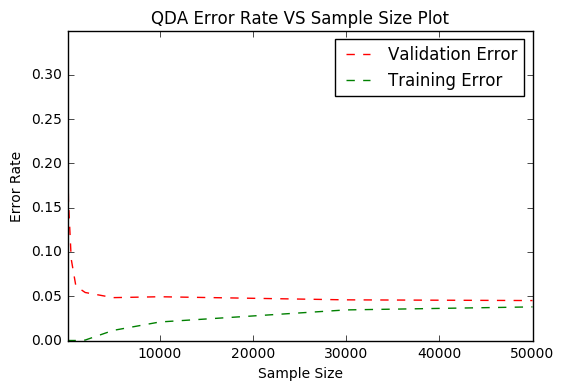

[0.0, 0.0, 0.0, 0.0, 0.00050000000000000001, 0.0114, 0.020899999999999998, 0.034533333333333333, 0.037940000000000002]
[0.24129999999999999, 0.15809999999999999, 0.091899999999999996, 0.061400000000000003, 0.054199999999999998, 0.048399999999999999, 0.049399999999999999, 0.045900000000000003, 0.045100000000000001]


In [540]:
#QDA
QDA_validation_error = list(range(0))
QDA_training_error = list(range(0))
for l in sample_size:
    index=random.sample(range(k),l)
    subset = np.asarray([normalized_training[i] for i in index])
    mean = np.empty((10,784))
    cov = np.empty((10,784,784))
    #Calculate MLE
    for j in range(10):
        digit = subset[subset[:,784]==j]
        mean[j] = np.mean(digit[:,0:784],axis=0)
        cov[j] = np.cov(digit[:,0:784].transpose()) + 0.001*np.eye(784)
    QDA_validation_posterior = np.empty((10,10000))
    for i in np.arange(10):
        QDA_validation_posterior[i] = sci.multivariate_normal.logpdf(normalized_validation,mean[i],cov[i]) + math.log(float(prior[i]))
    QDA_validation_error.append((QDA_validation_posterior.argmax(axis=0)!=validation_digit).sum()/10000)
    QDA_training_posterior=np.empty((10,l))
    for i in range(10):
        QDA_training_posterior[i] = sci.multivariate_normal.logpdf(subset[:,0:784],mean[i],cov[i])+math.log(float(prior[i]))
    QDA_training_error.append((QDA_training_posterior.argmax(axis=0)!=subset[:,784]).sum()/l)    

#Plot validation error and training error for QDA
QDA_error_v,=plt.plot(sample_size,QDA_validation_error,'r--')
QDA_error_t,=plt.plot(sample_size,QDA_training_error,'g--')
plt.title('QDA Error Rate VS Sample Size Plot')
plt.xlabel('Sample Size')
plt.ylabel('Error Rate')
plt.legend([QDA_error_v,QDA_error_t],['Validation Error','Training Error'])
plt.xlim(100,50000)
plt.ylim(0,0.35)
plt.show()
print(QDA_training_error)
print(QDA_validation_error)

In [533]:
test_data=scipy.io.loadmat('test.mat')['testX']
test_feature=np.empty((10000,784))
for i in range(10000):
    test_feature[i]=test_data[i]/np.linalg.norm(test_data[i],ord=2)

index = random.sample(range(k),30000)
subset = np.asarray([normalized_training[i] for i in index])
mean = np.empty((10,784))
cov = np.empty((10,784,784))
for j in range(10):
    digit = subset[subset[:,784]==j]
    mean[j] = np.mean(digit[:,0:784],axis=0)
    cov[j] = np.cov(digit[:,0:784].transpose())+0.001*np.eye(784)
QDA_posterior = np.empty((10,10000))
for i in np.arange(10):
    QDA_posterior[i] = sci.multivariate_normal.logpdf(test_feature,mean[i],cov[i])+math.log(float(prior[i]))
output = QDA_posterior.argmax(axis=0)
#Save for Kaggle Competition
np.savetxt("digit_test.csv",output)